# STAT435 - HW1

There are **four** questions in total, each of which has one or more side problems. Please read the instruction carefully and be clear with what part of the question you are answering.

## 1. Colored MNIST

Please do the following.

1. Visualize one of the MNIST digits. That is, render the numpy array using matplotlib or similar.\
Include the render in your homework write-up.

2. By default, the MNIST digits are grey scale. But we want them to be RGB.\
Convert the MNIST digits to RGB. *Hint: you want the arrays to go from (N, 28, 28) to (N, 28, 28, 3)*

3. Write code that trains a fully connected neural network on your transformed MNIST data.\
*Your network should have 3 layers and use Tanh activations.*\
*You should train for 5 epochs, each having at 1,000 training steps.*\
*Plot the learning curve, which has a test set accuracy on the y-axis, and total training time on the x-axis.*

4. We want to see how robust our learned model is to pertubations. Write code that transforms the background of MNIST digits from black to a random RGB color.\
Include in your writeup your rendering of one of these modified MNIST digits.\
After training a model on the standard MNIST digits, test this model using the colored MNIST digits.\
Show the learning curve for this model, which has the test accuracy of the colored digits on the y axis, and the total training time on the x-axis.\
**NOTE: You should never train your model on the colored digits. They are only for testing.**


5. Repeat prolem 4, only this time use a convolutional neural network with 2 layers rather than a fully connected netowrk.

### Starter Code

In [73]:
import matplotlib.pyplot as plt
import numpy as np

In [74]:
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

batch_size = 100


# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='/Users/zeyuzhang/Library/CloudStorage/OneDrive-NorthwesternUniversity/NU courses/436_reinforcement_Learning/homework/hw1/MNIST/',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='/Users/zeyuzhang/Library/CloudStorage/OneDrive-NorthwesternUniversity/NU courses/436_reinforcement_Learning/homework/hw1/MNIST',
                                          train=False,
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)



for i, (images, labels) in enumerate(train_loader):
    images = images.to(device)
    labels = labels.to(device)

cpu


## 1. Visualize one of the MNIST digits. That is, render the numpy array using matplotlib or similar. Include the render in your homework write-up.

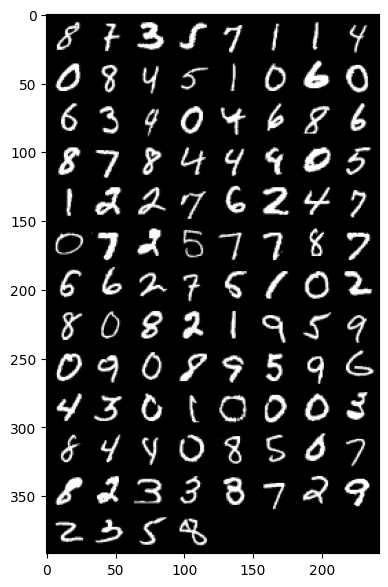

In [33]:
# visualize all the images
dataiter = iter(train_loader)
images, labels = next(dataiter)

img = torchvision.utils.make_grid(images)
npimg = img.numpy()
plt.figure(figsize=(10, 7))
plt.imshow(np.transpose(npimg, (1, 2, 0)))
plt.show()

## 2. By default, the MNIST digits are grey scale. But we want them to be RGB. Convert the MNIST digits to RGB. *Hint: you want the arrays to go from (N, 28, 28) to (N, 28, 28, 3)*

In [34]:
images.shape

torch.Size([100, 1, 28, 28])

In [45]:
# transform all the images in the train and test dataloader from grey scale to RGB. the array size should go from (N, 1, 28, 28) to (N, 28, 28, 3)

def grey_to_rgb(images):
    images = images.numpy()
    images = np.transpose(images, (0, 2, 3, 1))
    images = np.repeat(images, 3, axis=3)
    # print(images.shape)
    return images

In [46]:
# extract all images in both train and test dataloader, and change them to RGB

train_images = []
train_labels = []
for i, (images, labels) in enumerate(train_loader):
    images = grey_to_rgb(images)
    train_images.extend(images)
    train_labels.extend(labels.numpy())
    
test_images = []
test_labels = []
for i, (images, labels) in enumerate(test_loader):
    images = grey_to_rgb(images)
    test_images.extend(images)
    test_labels.extend(labels.numpy())
    
# convert the list to numpy array

train_images = np.array(train_images)
train_labels = np.array(train_labels)
train_labels = torch.from_numpy(train_labels)
train_images = torch.from_numpy(train_images)

test_images = np.array(test_images)
test_labels = np.array(test_labels)
test_labels = torch.from_numpy(test_labels)
test_images = torch.from_numpy(test_images)

In [47]:
# put the results back to the original dataloader

train_dataset = torch.utils.data.TensorDataset(train_images, train_labels)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_dataset = torch.utils.data.TensorDataset(test_images, test_labels)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

## 3. Write code that trains a fully connected neural network on your transformed MNIST data. 1. *Your network should have 3 layers and use Tanh activations.* 2. *You should train for 5 epochs, each having at 1,000 training steps.* 3. *Plot the learning curve, which has a test set accuracy on the y-axis, and total training time on the x-axis.*

In [48]:
# train a fully connected Neural Network
# network has 3 layers with Tanh activation function
# train 5 epochs, each have 1000 training steps

import torch.nn.functional as F
import torch.optim as optim

class MNISTNet(nn.Module):
    def __init__(self):
        super(MNISTNet, self).__init__()
        self.fc1 = nn.Linear(28*28*3, 500)
        self.fc2 = nn.Linear(500, 200)
        self.fc3 = nn.Linear(200, 10)

    def forward(self, x):
        x = x.view(-1, 28*28*3)
        x = F.tanh(self.fc1(x))
        x = F.tanh(self.fc2(x))
        x = self.fc3(x)
        return x

In [49]:
for (images, labels) in train_loader:
    images = images.to(device)
    labels = labels.to(device)
    print(images.shape)
    break

torch.Size([100, 28, 28, 3])


In [50]:
# start training
mnistnet = MNISTNet().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(mnistnet.parameters(), lr=0.001)

num_epochs = 5
num_batches = len(train_loader)
losses = []
test_accuracies = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # train one step for one batch
        optimizer.zero_grad()
        outputs = mnistnet(images)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # calculate the accuracy on the test set
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in test_loader:
                images = images.to(device)
                labels = labels.to(device)
                outputs = mnistnet(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        # record the loss and accuracy
        test_accuracies.append(100 * correct / total)
        losses.append(loss.item())

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Test Accuracy: {:.2f}%'.format(epoch+1, num_epochs, i+1, num_batches, loss.item(), 100 * correct / total))

Epoch [1/5], Step [100/600], Loss: 0.2356, Test Accuracy: 91.51%
Epoch [1/5], Step [200/600], Loss: 0.1621, Test Accuracy: 93.51%
Epoch [1/5], Step [300/600], Loss: 0.1329, Test Accuracy: 94.53%
Epoch [1/5], Step [400/600], Loss: 0.1289, Test Accuracy: 95.01%
Epoch [1/5], Step [500/600], Loss: 0.1328, Test Accuracy: 96.15%
Epoch [1/5], Step [600/600], Loss: 0.1118, Test Accuracy: 95.70%
Epoch [2/5], Step [100/600], Loss: 0.1072, Test Accuracy: 96.26%
Epoch [2/5], Step [200/600], Loss: 0.0977, Test Accuracy: 96.11%
Epoch [2/5], Step [300/600], Loss: 0.1272, Test Accuracy: 95.64%
Epoch [2/5], Step [400/600], Loss: 0.0998, Test Accuracy: 97.06%
Epoch [2/5], Step [500/600], Loss: 0.1827, Test Accuracy: 97.20%
Epoch [2/5], Step [600/600], Loss: 0.0356, Test Accuracy: 97.00%
Epoch [3/5], Step [100/600], Loss: 0.0720, Test Accuracy: 97.02%
Epoch [3/5], Step [200/600], Loss: 0.0444, Test Accuracy: 97.46%
Epoch [3/5], Step [300/600], Loss: 0.0358, Test Accuracy: 97.50%
Epoch [3/5], Step [400/60

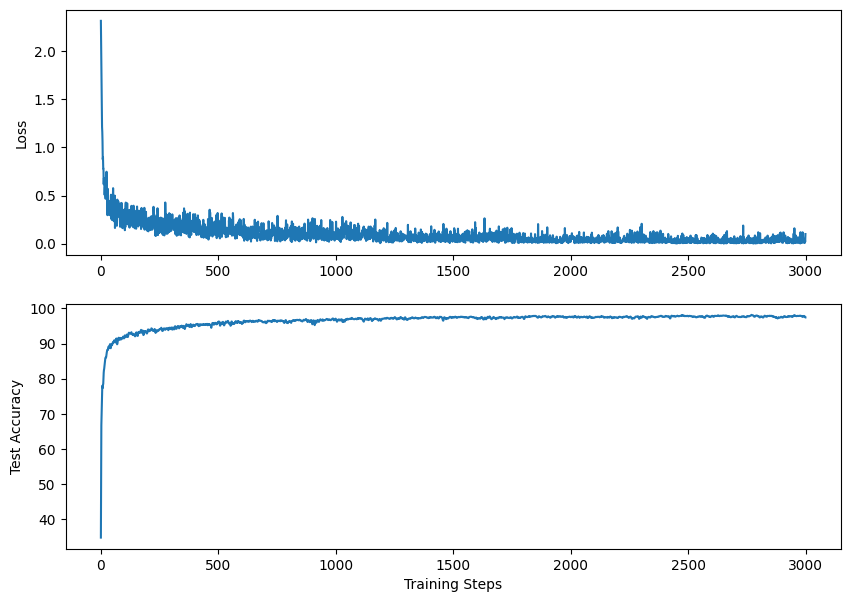

In [54]:
# plot the learning curve, loss and accuracy, as a function of training steps, in one figure with two subplots
plt.figure(figsize=(10, 7))
plt.subplot(2, 1, 1)
plt.plot(losses)
plt.ylabel('Loss')
plt.subplot(2, 1, 2)
plt.plot(test_accuracies)
plt.ylabel('Test Accuracy')
plt.xlabel('Training Steps')
plt.show()

## 4. We want to see how robust our learned model is to pertubations. Write code that transforms the background of MNIST digits from black to a random RGB color. Include in your writeup your rendering of one of these modified MNIST digits. After training a model on the standard MNIST digits, test this model using the colored MNIST digits. Show the learning curve for this model, which has the test accuracy of the colored digits on the y axis, and the total training time on the x-axis. **NOTE: You should never train your model on the colored digits. They are only for testing.**

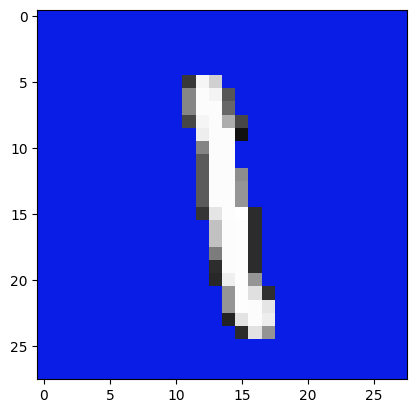

In [92]:
# Write code that transforms the background of MNIST digits from black to a random RGB color.
# The color should be different for each image, but the same for all pixels of the same image.
# The color should be sampled uniformly between 0 and 1.
# The output should be a tensor of size (N, 28, 28, 3) where N is the number of images.

# Function to transform background color
def transform_background(image):
    # Generate random RGB color
    bg_color = np.random.rand(3)

    # Create a mask for the digit (where pixel value is not 0)
    mask = image > 0

    # Create a new image with the random background color
    new_image = np.zeros((28, 28, 3), dtype=np.float32)
    new_image[:, :, 0] = bg_color[0]
    new_image[:, :, 1] = bg_color[1]
    new_image[:, :, 2] = bg_color[2]

    # Replace the background with the digit
    new_image[mask] = image[mask]

    return new_image

# test the function on one image in the train_loader
image_test = train_images[0].numpy()
newimage = transform_background(image_test)
plt.imshow(newimage)


In [93]:
# transform all the images in the test dataloader, and store them in a new dataloader
test_images_transformed = []
for image in test_images:
    image = image.numpy()
    newimage = transform_background(image)
    test_images_transformed.append(newimage)
    
test_images_transformed = np.array(test_images_transformed)
test_images_transformed = torch.from_numpy(test_images_transformed)

test_dataset_transformed = torch.utils.data.TensorDataset(test_images_transformed, test_labels)
test_loader_transformed = torch.utils.data.DataLoader(dataset=test_dataset_transformed,
                                          batch_size=batch_size,
                                          shuffle=False)


In [96]:
# train a fully connected Neural Network and test on the transformed test dataloader

mnistnetTransformed = MNISTNet().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(mnistnetTransformed.parameters(), lr=0.001)

num_epochs = 5
num_batches = len(train_loader)
losses_Transformed = []
test_accuracies_Transformed = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # train one step for one batch
        optimizer.zero_grad()
        outputs = mnistnetTransformed(images)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # calculate the accuracy on the test set
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in test_loader_transformed:
                images = images.to(device)
                labels = labels.to(device)
                outputs = mnistnetTransformed(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        # record the loss and accuracy
        test_accuracies_Transformed.append(100 * correct / total)
        losses_Transformed.append(loss.item())

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Test Accuracy: {:.2f}%'.format(epoch+1, num_epochs, i+1, num_batches, loss.item(), 100 * correct / total))

Epoch [1/5], Step [100/600], Loss: 0.3044, Test Accuracy: 22.62%
Epoch [1/5], Step [200/600], Loss: 0.2422, Test Accuracy: 14.77%
Epoch [1/5], Step [300/600], Loss: 0.1618, Test Accuracy: 18.36%
Epoch [1/5], Step [400/600], Loss: 0.1828, Test Accuracy: 10.47%
Epoch [1/5], Step [500/600], Loss: 0.1868, Test Accuracy: 10.75%
Epoch [1/5], Step [600/600], Loss: 0.0860, Test Accuracy: 13.11%
Epoch [2/5], Step [100/600], Loss: 0.0653, Test Accuracy: 15.93%
Epoch [2/5], Step [200/600], Loss: 0.1223, Test Accuracy: 10.29%
Epoch [2/5], Step [300/600], Loss: 0.0929, Test Accuracy: 12.58%
Epoch [2/5], Step [400/600], Loss: 0.0594, Test Accuracy: 14.09%
Epoch [2/5], Step [500/600], Loss: 0.1047, Test Accuracy: 12.86%
Epoch [2/5], Step [600/600], Loss: 0.1632, Test Accuracy: 13.31%
Epoch [3/5], Step [100/600], Loss: 0.0393, Test Accuracy: 13.23%
Epoch [3/5], Step [200/600], Loss: 0.0289, Test Accuracy: 13.27%
Epoch [3/5], Step [300/600], Loss: 0.0391, Test Accuracy: 13.37%
Epoch [3/5], Step [400/60

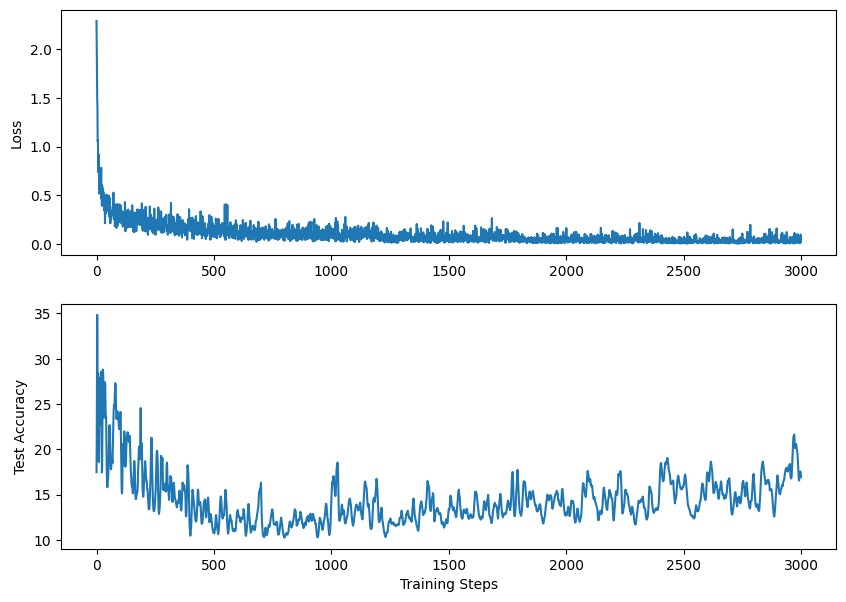

In [97]:
# plot the learning curve, loss and accuracy, as a function of training steps, in one figure with two subplots
plt.figure(figsize=(10, 7))
plt.subplot(2, 1, 1)
plt.plot(losses_Transformed)
plt.ylabel('Loss')
plt.subplot(2, 1, 2)
plt.plot(test_accuracies_Transformed)
plt.ylabel('Test Accuracy')
plt.xlabel('Training Steps')
plt.show()

## 5. Repeat prolem 4, only this time use a convolutional neural network with 2 layers rather than a fully connected netowrk.

In [100]:
# reshape the images in both train and test_transformed dataloader from (N, 28, 28, 3) to (N, 3, 28, 28)
train_images = train_images.permute(0, 3, 1, 2)
test_images_transformed = test_images_transformed.permute(0, 3, 1, 2)

# store the results into new dataloaders
train_dataset_new = torch.utils.data.TensorDataset(train_images, train_labels)
train_loader_new = torch.utils.data.DataLoader(dataset=train_dataset_new,
                                           batch_size=batch_size,
                                           shuffle=True)

test_dataset_new = torch.utils.data.TensorDataset(test_images_transformed, test_labels)
test_loader_new = torch.utils.data.DataLoader(dataset=test_dataset_new,
                                          batch_size=batch_size,
                                          shuffle=False)

In [101]:
# construct a convolutional neural network with two layers for the MNIST dataset
# train the CNN on the original MNIST dataset
# test the CNN on the transformed MNIST dataset

class CNNMinst(nn.Module):
    def __init__(self):
        super(CNNMinst, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(7*7*32, 10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

In [102]:
# train the CNN on the original MNIST dataset
cnn = CNNMinst().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn.parameters(), lr=0.001)

num_epochs = 5
num_batches = len(train_loader)
losses_cnn = []
test_accuracies_cnn = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader_new):
        images = images.to(device)
        labels = labels.to(device)

        # train one step for one batch
        optimizer.zero_grad()
        outputs = cnn(images)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # calculate the accuracy on the test set
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in test_loader_new:
                images = images.to(device)
                labels = labels.to(device)
                outputs = cnn(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        # record the loss and accuracy
        test_accuracies_cnn.append(100 * correct / total)
        losses_cnn.append(loss.item())

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Test Accuracy: {:.2f}%'.format(epoch+1, num_epochs, i+1, num_batches, loss.item(), 100 * correct / total))

Epoch [1/5], Step [100/600], Loss: 0.1585, Test Accuracy: 30.01%
Epoch [1/5], Step [200/600], Loss: 0.1819, Test Accuracy: 21.63%
Epoch [1/5], Step [300/600], Loss: 0.0996, Test Accuracy: 28.89%
Epoch [1/5], Step [400/600], Loss: 0.0786, Test Accuracy: 35.05%
Epoch [1/5], Step [500/600], Loss: 0.0649, Test Accuracy: 41.64%
Epoch [1/5], Step [600/600], Loss: 0.0193, Test Accuracy: 36.65%
Epoch [2/5], Step [100/600], Loss: 0.0635, Test Accuracy: 34.14%
Epoch [2/5], Step [200/600], Loss: 0.0712, Test Accuracy: 45.13%
Epoch [2/5], Step [300/600], Loss: 0.0288, Test Accuracy: 50.47%
Epoch [2/5], Step [400/600], Loss: 0.0156, Test Accuracy: 48.21%
Epoch [2/5], Step [500/600], Loss: 0.0413, Test Accuracy: 50.92%
Epoch [2/5], Step [600/600], Loss: 0.0987, Test Accuracy: 52.93%
Epoch [3/5], Step [100/600], Loss: 0.0662, Test Accuracy: 50.09%
Epoch [3/5], Step [200/600], Loss: 0.1014, Test Accuracy: 47.14%
Epoch [3/5], Step [300/600], Loss: 0.0410, Test Accuracy: 54.33%
Epoch [3/5], Step [400/60

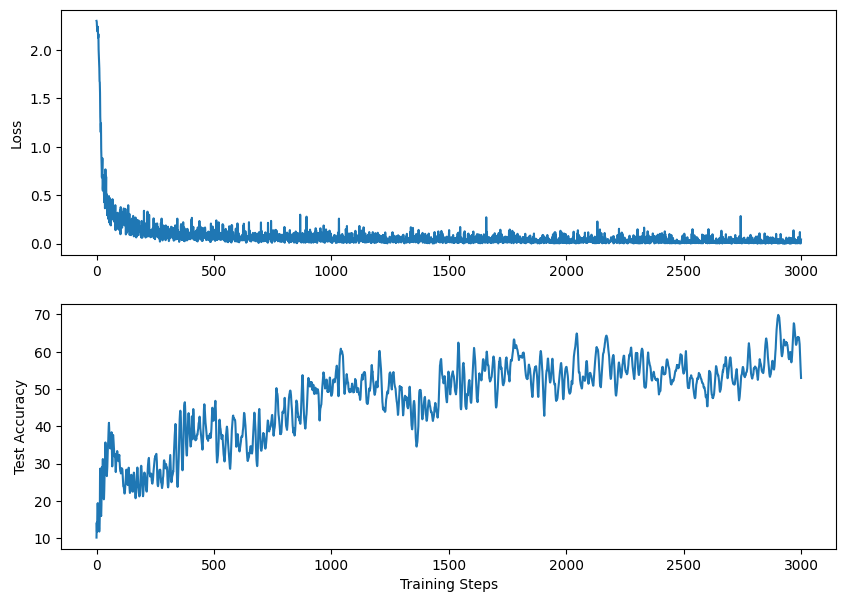

In [103]:
# plot the learning curve, loss and accuracy, as a function of training steps, in one figure with two subplots
plt.figure(figsize=(10, 7))
plt.subplot(2, 1, 1)
plt.plot(losses_cnn)
plt.ylabel('Loss')
plt.subplot(2, 1, 2)
plt.plot(test_accuracies_cnn)
plt.ylabel('Test Accuracy')
plt.xlabel('Training Steps')
plt.show()

# 2. Intro to Gym

This question serves as an introduction to the OpenAI Gym API.

To begin with, please install gym with the command: pip install gym.\
Gym is a set of classical RL environments and problems that were once used for RL reserach.\
Today, these environemnts are mostly unused in research. However, the general API established in the library continues to live on.

1. Implement the function random_policy, which takes the observation, ignores it, and returns a random action.\
Sample the actions uniformly, with equal probability of any action.

2. Compare the performance of sin_policy and random policy. Do this by running both policies 100 times until termination. Then report the mean and variance of the number of steps achieved by each policy.

3. Try to devise a hand-coded policy that beats sin_policy. This policy should NOT use any machine learning.\
It should be a determinstic function of the input. Report the mean and variance of your policy across 100 samples.

### Starter Code

In [104]:
import random
import numpy as np
import gym

# To make output consistent
np.random.seed(42)

# This makes the cartpole env
env = gym.make('CartPole-v1')

env.action_space.seed(42)
env.observation_space.seed(42)

obs, info = env.reset()
print(obs)

# This shows the action space is 2 dimensional and discrete.
print(env.action_space)

# For discrete action spaces, the action is given as an integer in the range [0, action-range - 1]
# For the case of cartpole, this means the action is an integer in the range [0, 1]
# 0 pushes the cart to the left and 1 pushes the cart to the right.

# To actually move the env forward, we must tell it what action should be taken.

[0.0074926  0.01434765 0.04738456 0.03769989]
Discrete(2)


In [10]:
def sin_policy(obs):
    # Generally a policy will take some function of the observation and return an action.
    # For example:
    sin_obs = np.sin(obs[1])
    policy_action = None
    if sin_obs > 0:
        policy_action = 0
    else:
        policy_action = 1
    return policy_action


def random_policy(obs):
    # Takes an observation and returns a random action.
    return env.action_space.sample()

def my_policy(obs):
    # As for my policy, I will try to control the cart based on two aspects: cart and pole
    # For the cart, it has two attributes: position and velocity. Our goal is to keep position near 0 and velocity near 0.
    # As a result, we set the action to 0 if the position is on the right side and the velocity is positive, and vice versa.
    # For the pole, it has two attributes: angle and angular velocity. Our goal is to keep the pole vertical.
    
    a_cart = 0 
    a_pole = 0
    if obs[0] > 0 and obs[1] > 0:  # cart on the right and moving right
        a_cart = 0
    elif obs[0] < 0 and obs[1] < 0:  # cart on the left and moving left
        a_cart = 1
    else: 
        a_cart = -1  # can't decide
    
    if obs[2] > 0 and obs[3] > 0:  # pole on the right and moving right
        a_pole = 1  # move left
    elif obs[2] < 0 and obs[3] < 0:  # pole on the left and moving left
        a_pole = 0
    else: 
        a_pole = -1  # can't decide
        
    # Then we need to decide over the two actions
    action = -1
    if a_cart <0:
        if a_pole >= 0:
            action = a_pole
        else:  # both can't decide
            # compare the velocity of the cart and the pole
            if np.abs(obs[1]) > np.abs(obs[3]):  # cart is moving faster
                action = 0 if obs[2] > 0 else 1
            elif np.abs(obs[1]) < np.abs(obs[3]):  # pole is moving faster
                action = 0 if obs[0] > 0 else 1
            else:
                action = np.random.choice([0, 1])
    else:
        if a_pole < 0:
            action = a_cart
        else: # both can choose a action, let's choose the action to alleviate the more extreme situation
            if np.abs(obs[0])/4.8 > np.abs(obs[2])/0.418:  # cart is more extreme
                action = a_cart
            elif np.abs(obs[0])/4.8 < np.abs(obs[2])/0.418:  # pole is more extreme
                action = a_pole
            else:
                action = np.random.choice([a_cart, a_pole])
                
    return action
            

In [10]:
# We see that stepping forward with env.step() returns the next observation, i.e. the result
# of taking the given action in the environment. It also returns the reward in the environment,
# and the terminated flag which tells us if the episode has ended.
# Common reasons for the episode to end are succeeding or failing at the task.


# Usually, we use the policy to write a for loop over the environment, moving it forward according to the policy.

def policy_evaluation(horizon, policy):
    obs, info = env.reset()
    terminated = False
    for i in range(horizon):
        if terminated is False:
            action = policy(obs)
            next_obs, reward, terminated, truncated, info = env.step(action)
            obs = next_obs
        else:
            break
    return i

In [14]:
# do evaluation over 100 episodes, for all three policies
horizon = 500
num_episodes = 100

policys = [sin_policy, random_policy, my_policy]
step_policies= []
for policy in policys:
    print(F"Policy: {policy.__name__}")
    steps = []
    for i in range(num_episodes):
        step = policy_evaluation(horizon, policy)
        steps.append(step)
        print(F"Episode: {i}, Steps: {step}")
    step_policies.append(steps)


Policy: sin_policy
Moviepy - Building video /Users/zeyuzhang/Library/CloudStorage/OneDrive-NorthwesternUniversity/NU courses/436_reinforcement_Learning/homework/hw1/video/sin_policy-episode-1.mp4.
Moviepy - Writing video /Users/zeyuzhang/Library/CloudStorage/OneDrive-NorthwesternUniversity/NU courses/436_reinforcement_Learning/homework/hw1/video/sin_policy-episode-1.mp4



Moviepy - Done !
Moviepy - video ready /Users/zeyuzhang/Library/CloudStorage/OneDrive-NorthwesternUniversity/NU courses/436_reinforcement_Learning/homework/hw1/video/sin_policy-episode-1.mp4
Episode: 0, Steps: 53
Episode: 1, Steps: 93
Episode: 2, Steps: 51
Episode: 3, Steps: 47
Episode: 4, Steps: 30
Episode: 5, Steps: 20
Episode: 6, Steps: 49
Moviepy - Building video /Users/zeyuzhang/Library/CloudStorage/OneDrive-NorthwesternUniversity/NU courses/436_reinforcement_Learning/homework/hw1/video/sin_policy-episode-8.mp4.
Moviepy - Writing video /Users/zeyuzhang/Library/CloudStorage/OneDrive-NorthwesternUniversity/NU courses/436_reinforcement_Learning/homework/hw1/video/sin_policy-episode-8.mp4



Moviepy - Done !
Moviepy - video ready /Users/zeyuzhang/Library/CloudStorage/OneDrive-NorthwesternUniversity/NU courses/436_reinforcement_Learning/homework/hw1/video/sin_policy-episode-8.mp4
Episode: 7, Steps: 56
Episode: 8, Steps: 40
Episode: 9, Steps: 41
Episode: 10, Steps: 31
Episode: 11, Steps: 84
Episode: 12, Steps: 26
Episode: 13, Steps: 53
Episode: 14, Steps: 31
Episode: 15, Steps: 30
Episode: 16, Steps: 42
Episode: 17, Steps: 28
Episode: 18, Steps: 38
Episode: 19, Steps: 35
Episode: 20, Steps: 79
Episode: 21, Steps: 42
Episode: 22, Steps: 26
Episode: 23, Steps: 33
Episode: 24, Steps: 33
Episode: 25, Steps: 40
Moviepy - Building video /Users/zeyuzhang/Library/CloudStorage/OneDrive-NorthwesternUniversity/NU courses/436_reinforcement_Learning/homework/hw1/video/sin_policy-episode-27.mp4.
Moviepy - Writing video /Users/zeyuzhang/Library/CloudStorage/OneDrive-NorthwesternUniversity/NU courses/436_reinforcement_Learning/homework/hw1/video/sin_policy-episode-27.mp4



Moviepy - Done !
Moviepy - video ready /Users/zeyuzhang/Library/CloudStorage/OneDrive-NorthwesternUniversity/NU courses/436_reinforcement_Learning/homework/hw1/video/sin_policy-episode-27.mp4
Episode: 26, Steps: 27
Episode: 27, Steps: 30
Episode: 28, Steps: 55
Episode: 29, Steps: 54
Episode: 30, Steps: 79
Episode: 31, Steps: 24
Episode: 32, Steps: 25
Episode: 33, Steps: 22
Episode: 34, Steps: 73
Episode: 35, Steps: 26
Episode: 36, Steps: 29
Episode: 37, Steps: 26
Episode: 38, Steps: 75
Episode: 39, Steps: 69
Episode: 40, Steps: 29
Episode: 41, Steps: 31
Episode: 42, Steps: 34
Episode: 43, Steps: 46
Episode: 44, Steps: 24
Episode: 45, Steps: 48
Episode: 46, Steps: 26
Episode: 47, Steps: 24
Episode: 48, Steps: 51
Episode: 49, Steps: 50
Episode: 50, Steps: 41
Episode: 51, Steps: 36
Episode: 52, Steps: 41
Episode: 53, Steps: 35
Episode: 54, Steps: 60
Episode: 55, Steps: 42
Episode: 56, Steps: 44
Episode: 57, Steps: 40
Episode: 58, Steps: 24
Episode: 59, Steps: 37
Episode: 60, Steps: 40
Epi

Moviepy - Done !
Moviepy - video ready /Users/zeyuzhang/Library/CloudStorage/OneDrive-NorthwesternUniversity/NU courses/436_reinforcement_Learning/homework/hw1/video/sin_policy-episode-64.mp4
Episode: 63, Steps: 47
Episode: 64, Steps: 33
Episode: 65, Steps: 42
Episode: 66, Steps: 50
Episode: 67, Steps: 35
Episode: 68, Steps: 25
Episode: 69, Steps: 52
Episode: 70, Steps: 31
Episode: 71, Steps: 41
Episode: 72, Steps: 39
Episode: 73, Steps: 28
Episode: 74, Steps: 32
Episode: 75, Steps: 39
Episode: 76, Steps: 28
Episode: 77, Steps: 34
Episode: 78, Steps: 40
Episode: 79, Steps: 63
Episode: 80, Steps: 22
Episode: 81, Steps: 28
Episode: 82, Steps: 33
Episode: 83, Steps: 26
Episode: 84, Steps: 65
Episode: 85, Steps: 39
Episode: 86, Steps: 29
Episode: 87, Steps: 50
Episode: 88, Steps: 63
Episode: 89, Steps: 62
Episode: 90, Steps: 36
Episode: 91, Steps: 38
Episode: 92, Steps: 34
Episode: 93, Steps: 23
Episode: 94, Steps: 71
Episode: 95, Steps: 33
Episode: 96, Steps: 28
Episode: 97, Steps: 24
Epi

Moviepy - Done !
Moviepy - video ready /Users/zeyuzhang/Library/CloudStorage/OneDrive-NorthwesternUniversity/NU courses/436_reinforcement_Learning/homework/hw1/video/sin_policy-episode-125.mp4
Episode: 24, Steps: 25
Episode: 25, Steps: 54
Episode: 26, Steps: 19
Episode: 27, Steps: 25
Episode: 28, Steps: 36
Episode: 29, Steps: 26
Episode: 30, Steps: 12
Episode: 31, Steps: 46
Episode: 32, Steps: 12
Episode: 33, Steps: 17
Episode: 34, Steps: 26
Episode: 35, Steps: 44
Episode: 36, Steps: 19
Episode: 37, Steps: 25
Episode: 38, Steps: 11
Episode: 39, Steps: 21
Episode: 40, Steps: 13
Episode: 41, Steps: 22
Episode: 42, Steps: 11
Episode: 43, Steps: 33
Episode: 44, Steps: 13
Episode: 45, Steps: 22
Episode: 46, Steps: 20
Episode: 47, Steps: 14
Episode: 48, Steps: 15
Episode: 49, Steps: 9
Episode: 50, Steps: 14
Episode: 51, Steps: 21
Episode: 52, Steps: 17
Episode: 53, Steps: 45
Episode: 54, Steps: 24
Episode: 55, Steps: 33
Episode: 56, Steps: 16
Episode: 57, Steps: 14
Episode: 58, Steps: 53
Epi

Moviepy - Done !
Moviepy - video ready /Users/zeyuzhang/Library/CloudStorage/OneDrive-NorthwesternUniversity/NU courses/436_reinforcement_Learning/homework/hw1/video/sin_policy-episode-216.mp4
Episode: 15, Steps: 111
Episode: 16, Steps: 162
Episode: 17, Steps: 176
Episode: 18, Steps: 55
Episode: 19, Steps: 178
Episode: 20, Steps: 121
Episode: 21, Steps: 167
Episode: 22, Steps: 165
Episode: 23, Steps: 90
Episode: 24, Steps: 52
Episode: 25, Steps: 188
Episode: 26, Steps: 141
Episode: 27, Steps: 148
Episode: 28, Steps: 167
Episode: 29, Steps: 131
Episode: 30, Steps: 36
Episode: 31, Steps: 159
Episode: 32, Steps: 106
Episode: 33, Steps: 197
Episode: 34, Steps: 207
Episode: 35, Steps: 140
Episode: 36, Steps: 208
Episode: 37, Steps: 93
Episode: 38, Steps: 179
Episode: 39, Steps: 174
Episode: 40, Steps: 112
Episode: 41, Steps: 40
Episode: 42, Steps: 112
Episode: 43, Steps: 193
Episode: 44, Steps: 203
Episode: 45, Steps: 187
Episode: 46, Steps: 215
Episode: 47, Steps: 41
Episode: 48, Steps: 11

In [15]:
# calculate the average steps, and the variance of the steps for each policy
for i, policy in enumerate(policys):
    steps = step_policies[i]
    mean = np.mean(steps)
    var = np.var(steps)
    print(F"Policy: {policy.__name__}, Mean: {mean}, Variance: {var}")

Policy: sin_policy, Mean: 41.71, Variance: 285.80590000000007
Policy: random_policy, Mean: 23.09, Variance: 162.8619
Policy: my_policy, Mean: 139.2, Variance: 2487.1


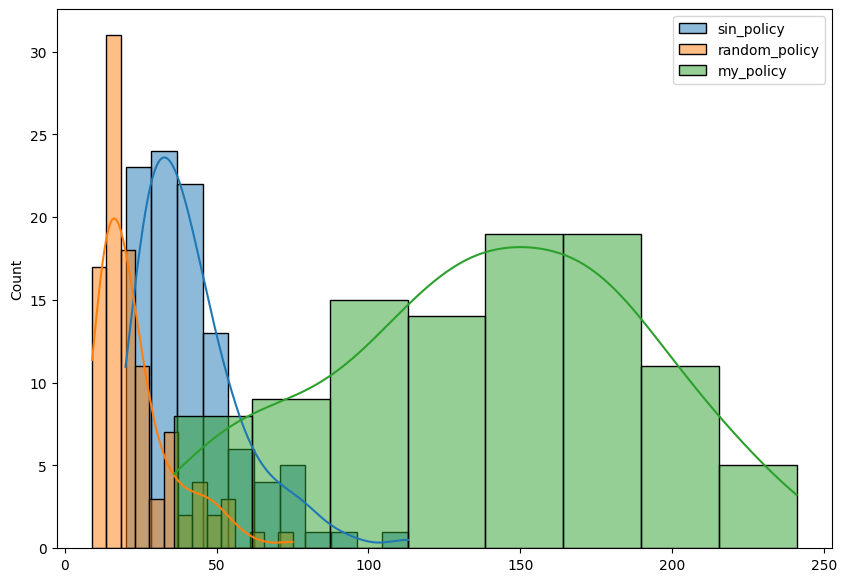

In [16]:
# plot the distribution of the steps for each policy
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.histplot(step_policies[0], kde=True, label='sin_policy')
sns.histplot(step_policies[1], kde=True, label='random_policy')
sns.histplot(step_policies[2], kde=True, label='my_policy')
plt.legend()
plt.show()

# 3. Cartpole - Linear Quadratic Regulator (LQR)

We can look Cartpole problem as an optimal control problem. In particular, we can linearize non-linear dynamics to get a close form policy. In this problem, you will use Linear Quadratic Regulator to come up with a policy for the cartpole problem.

1. Review the LQR. Note that the *control* package does the dirty job for you.

2. Run a simulation 100 times and see how the lqr policy does compared to the policies in the previous question. (report the mean and variance of steps achieved)

### Starter Code

In [25]:
import control
import numpy as np
import gym

In [23]:
# To make output consistent
np.random.seed(42)

# This makes the cartpole env
env = gym.make('CartPole-v1')

env.action_space.seed(42)
env.observation_space.seed(42)


def lqr_policy(observation):
    M = float(env.masscart)
    m = float(env.masspole)
    l = float(env.length)
    g = float(env.gravity)
    # observation: state. 4D in this case.
    x, v, theta, v_theta = observation
    # cost function

    Q = np.identity(4)
    R = np.identity(1)

    # linearization
    A = np.identity(4)
    A = [[0, 1, 0, 0],
        [0, 0, -m*g/M, 0],
        [0, 0, 0, 1],
        [0, 0, (M+m)*g/(l*M), 0]]
    A = np.array(A)

    B = np.ones((4,1))
    B = [[0], [1/M], [0], [-1/(l*M)]]
    B = np.array(B)
    
    #print("A:",A.shape)
    #print("B:",B.shape)
    #print("Q:",Q.shape)
    #print("R:",R.shape)

    #K (2-d array) – State feedback gains: in our case, we have u = -Kx
    #S (2-d array) – Solution to Riccati equation
    #E (1-d array) – Eigenvalues of the closed loop system
    K, S, E = control.lqr(A,B,Q,R)
    #print("Observation:",observation)

    action = -1*np.dot(K,observation)
    
    if action >= 0:
        return 1
    else:
        return 0

In [19]:
# run the policy evaluation for the LQR policy
horizon = 500
num_episodes = 100
steps_lqr = []

for i in range(num_episodes):
    step = policy_evaluation(horizon, lqr_policy)
    steps_lqr.append(step)
    print(F"Episode: {i}, Steps: {step}")
    
# calculate the average steps, and the variance of the steps for the LQR policy
mean = np.mean(steps_lqr)
var = np.var(steps_lqr)
print(F"Policy: LQR, Mean: {mean}, Variance: {var}")

Episode: 0, Steps: 499
Episode: 1, Steps: 499
Episode: 2, Steps: 499
Episode: 3, Steps: 499
Episode: 4, Steps: 499
Episode: 5, Steps: 499
Episode: 6, Steps: 499
Episode: 7, Steps: 499
Episode: 8, Steps: 499
Episode: 9, Steps: 499
Episode: 10, Steps: 499
Episode: 11, Steps: 499
Episode: 12, Steps: 499
Episode: 13, Steps: 499
Episode: 14, Steps: 499
Episode: 15, Steps: 499
Episode: 16, Steps: 499
Episode: 17, Steps: 499
Episode: 18, Steps: 499
Episode: 19, Steps: 499
Episode: 20, Steps: 499
Episode: 21, Steps: 499
Episode: 22, Steps: 499
Episode: 23, Steps: 499
Episode: 24, Steps: 499
Episode: 25, Steps: 499
Episode: 26, Steps: 499
Episode: 27, Steps: 499
Episode: 28, Steps: 499
Episode: 29, Steps: 499
Episode: 30, Steps: 499
Episode: 31, Steps: 499
Episode: 32, Steps: 499
Episode: 33, Steps: 499
Episode: 34, Steps: 499
Episode: 35, Steps: 499
Episode: 36, Steps: 499
Episode: 37, Steps: 499
Episode: 38, Steps: 499
Episode: 39, Steps: 499
Episode: 40, Steps: 499
Episode: 41, Steps: 499
Ep

In [45]:
import gym
from gym.wrappers import RecordVideo

# Create the CartPole environment
env = gym.make('CartPole-v1', render_mode='rgb_array')

# Wrap the environment with RecordVideo
env = RecordVideo(env, './video', episode_trigger=lambda x: True)  # Record the first episode

# Reset the environment to start the episode
observation = env.reset()

# Run episodes for all the policies
horizon = 500
num_episodes = 1

policys = [sin_policy, random_policy, my_policy, lqr_policy]
step_policies= []
for policy in policys:
    print(F"Policy: {policy.__name__}")
    steps = []
    for i in range(num_episodes):
        step = policy_evaluation(horizon, policy)
        steps.append(step)
        print(F"Episode: {i}, Steps: {step}")
    step_policies.append(steps)
    
# Close the environment
env.close()

/Users/zeyuzhang/miniconda3/envs/ltr/lib/python3.10/site-packages/gym/wrappers/record_video.py:75: UserWarning: WARN: Overwriting existing videos at /Users/zeyuzhang/Library/CloudStorage/OneDrive-NorthwesternUniversity/NU courses/436_reinforcement_Learning/homework/hw1/video folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(
t:   0%|          | 1/501 [20:50<173:42:29, 1250.70s/it, now=None]

Policy: sin_policy
Moviepy - Building video /Users/zeyuzhang/Library/CloudStorage/OneDrive-NorthwesternUniversity/NU courses/436_reinforcement_Learning/homework/hw1/video/rl-video-episode-0.mp4.
Moviepy - Writing video /Users/zeyuzhang/Library/CloudStorage/OneDrive-NorthwesternUniversity/NU courses/436_reinforcement_Learning/homework/hw1/video/rl-video-episode-0.mp4



t:   0%|          | 1/501 [20:50<173:44:11, 1250.90s/it, now=None]

Moviepy - Done !
Moviepy - video ready /Users/zeyuzhang/Library/CloudStorage/OneDrive-NorthwesternUniversity/NU courses/436_reinforcement_Learning/homework/hw1/video/rl-video-episode-0.mp4
Episode: 0, Steps: 63
Policy: random_policy
Moviepy - Building video /Users/zeyuzhang/Library/CloudStorage/OneDrive-NorthwesternUniversity/NU courses/436_reinforcement_Learning/homework/hw1/video/rl-video-episode-1.mp4.
Moviepy - Writing video /Users/zeyuzhang/Library/CloudStorage/OneDrive-NorthwesternUniversity/NU courses/436_reinforcement_Learning/homework/hw1/video/rl-video-episode-1.mp4



t:   0%|          | 1/501 [20:50<173:44:48, 1250.98s/it, now=None]

Moviepy - Done !
Moviepy - video ready /Users/zeyuzhang/Library/CloudStorage/OneDrive-NorthwesternUniversity/NU courses/436_reinforcement_Learning/homework/hw1/video/rl-video-episode-1.mp4
Episode: 0, Steps: 21
Policy: my_policy


t:   0%|          | 1/501 [20:51<173:46:45, 1251.21s/it, now=None]

Moviepy - Building video /Users/zeyuzhang/Library/CloudStorage/OneDrive-NorthwesternUniversity/NU courses/436_reinforcement_Learning/homework/hw1/video/rl-video-episode-2.mp4.
Moviepy - Writing video /Users/zeyuzhang/Library/CloudStorage/OneDrive-NorthwesternUniversity/NU courses/436_reinforcement_Learning/homework/hw1/video/rl-video-episode-2.mp4



t:   0%|          | 1/501 [20:51<173:48:44, 1251.45s/it, now=None]

Moviepy - Done !
Moviepy - video ready /Users/zeyuzhang/Library/CloudStorage/OneDrive-NorthwesternUniversity/NU courses/436_reinforcement_Learning/homework/hw1/video/rl-video-episode-2.mp4
Episode: 0, Steps: 235
Policy: lqr_policy


t:   0%|          | 1/501 [20:52<173:59:53, 1252.79s/it, now=None]

Moviepy - Building video /Users/zeyuzhang/Library/CloudStorage/OneDrive-NorthwesternUniversity/NU courses/436_reinforcement_Learning/homework/hw1/video/rl-video-episode-3.mp4.
Moviepy - Writing video /Users/zeyuzhang/Library/CloudStorage/OneDrive-NorthwesternUniversity/NU courses/436_reinforcement_Learning/homework/hw1/video/rl-video-episode-3.mp4



t:   0%|          | 1/501 [20:53<174:03:50, 1253.26s/it, now=None]

Moviepy - Done !
Moviepy - video ready /Users/zeyuzhang/Library/CloudStorage/OneDrive-NorthwesternUniversity/NU courses/436_reinforcement_Learning/homework/hw1/video/rl-video-episode-3.mp4
Episode: 0, Steps: 499


# 4. Cartpole - Imitation Learning

Now, we learn a model that ``imitates" the expert's action. In this question, we will model an expert with a simple 2-layer neural network.

1. Run the simulation of the trained policy 100 times and see how this method compares to other methods (report the mean and variance of steps achieved by the train policy).

### Starter Code

In [1]:
import numpy as np
import gym

from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np

# To make output consistent
np.random.seed(42)

# This makes the cartpole env
env = gym.make('CartPole-v1')

env.action_space.seed(42)
env.observation_space.seed(42)

obs, info = env.reset()
print(obs)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

[ 0.03978947 -0.02185543 -0.04258432 -0.01633881]


In [2]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        # This is a 2-layer neural network
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.tanh = nn.Tanh()
        self.fc2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.tanh(out)
        out = self.fc2(out)
        return out

In [3]:
input_size = 4
hidden_size = 32
num_classes = 2

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [4]:
# expert data
with open('data_acts.npy', 'rb') as f:
    acts = np.load(f)
with open('data_obs.npy', 'rb') as f:
    obs = np.load(f)

In [5]:
acts = acts.astype(int)
# reshape acts to one dimension
acts = acts.reshape(-1)
acts[:10]

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 1])

In [6]:
# need to convert the actions to one-hot encoding

acts_onehot = np.zeros((len(acts), num_classes))
acts_onehot[np.arange(len(acts)), acts] = 1
acts_onehot = torch.from_numpy(acts_onehot).float()

# convert the observations to tensor
obs = torch.from_numpy(obs).float()


In [7]:
# Loss and optimizer
learning_rate = 5e-3
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [8]:
# imitation learning policy
def imitation_policy(observation):
    with torch.no_grad():
        observation = torch.tensor(observation, dtype=torch.float32).to(device)
        action = model(observation)
        action = 1 if action[1] > action[0] else 0
        return action

In [12]:
horizon = 500

In [13]:
total_step = 0
epoch = 0
num_epochs = 100
batch_size = 32
losses_imitation = []
reward_imitation = []
test_episodes = 100
for j in range(num_epochs):
    epoch += 1
    for i in range(len(obs)//batch_size+1):
        total_step += 1
        # formulate observation and action minibatches
        if i == len(obs)//batch_size:
            obs_mb = torch.tensor(obs[i*batch_size:], dtype=torch.float32).to(device)
            acts_mb = torch.tensor(acts_onehot[i*batch_size:], dtype=torch.float32).to(device)
        else:
            obs_mb = torch.tensor(obs[i*batch_size:(i+1)*batch_size], dtype=torch.float32).to(device)
            acts_mb = torch.tensor(acts_onehot[i*batch_size:(i+1)*batch_size], dtype=torch.float32).to(device)

        # Forward pass
        outputs = model(obs_mb.float())
        loss = criterion(outputs, acts_mb)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # record the loss
        losses_imitation.append(loss.item())

    # do evaluation for each epoch
    steps = []
    for i in range(test_episodes):
        step = policy_evaluation(horizon, imitation_policy)
        steps.append(step)
    avg_steps = np.mean(steps)
    reward_imitation.append(avg_steps)
    print('Epoch [{}/{}], Loss: {:.4f}, Average Steps: {:.2f}'
            .format(epoch + 1, num_epochs, loss.item(), avg_steps))
    

/var/folders/7z/tnnvjsr14ybc9d5kt7_3zlnh0000gn/T/ipykernel_43634/471749898.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  obs_mb = torch.tensor(obs[i*batch_size:(i+1)*batch_size], dtype=torch.float32).to(device)
/var/folders/7z/tnnvjsr14ybc9d5kt7_3zlnh0000gn/T/ipykernel_43634/471749898.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  acts_mb = torch.tensor(acts_onehot[i*batch_size:(i+1)*batch_size], dtype=torch.float32).to(device)
/var/folders/7z/tnnvjsr14ybc9d5kt7_3zlnh0000gn/T/ipykernel_43634/471749898.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than t

Epoch [2/100], Loss: 0.4575, Average Steps: 93.09
Epoch [3/100], Loss: 0.4321, Average Steps: 95.34
Epoch [4/100], Loss: 0.4275, Average Steps: 97.27
Epoch [5/100], Loss: 0.4289, Average Steps: 124.14
Epoch [6/100], Loss: 0.4303, Average Steps: 156.37
Epoch [7/100], Loss: 0.4308, Average Steps: 190.16
Epoch [8/100], Loss: 0.4305, Average Steps: 202.40
Epoch [9/100], Loss: 0.4296, Average Steps: 282.50
Epoch [10/100], Loss: 0.4282, Average Steps: 300.64
Epoch [11/100], Loss: 0.4264, Average Steps: 310.79
Epoch [12/100], Loss: 0.4244, Average Steps: 302.71
Epoch [13/100], Loss: 0.4222, Average Steps: 346.95
Epoch [14/100], Loss: 0.4197, Average Steps: 392.05
Epoch [15/100], Loss: 0.4171, Average Steps: 396.42
Epoch [16/100], Loss: 0.4143, Average Steps: 417.75
Epoch [17/100], Loss: 0.4113, Average Steps: 460.03
Epoch [18/100], Loss: 0.4081, Average Steps: 486.94
Epoch [19/100], Loss: 0.4047, Average Steps: 494.48
Epoch [20/100], Loss: 0.4012, Average Steps: 495.75
Epoch [21/100], Loss: 0

In [14]:
# evaluate the imitation policy
horizon = 500
num_episodes = 100
steps_imitation = []

for i in range(num_episodes):
    step = policy_evaluation(horizon, imitation_policy)
    steps_imitation.append(step)
    
# calculate the average steps, and the variance of the steps for the imitation policy
mean = np.mean(steps_imitation)
var = np.var(steps_imitation)
print(F"Policy: Imitation, Mean: {mean}, Variance: {var}")

Policy: Imitation, Mean: 499.0, Variance: 0.0


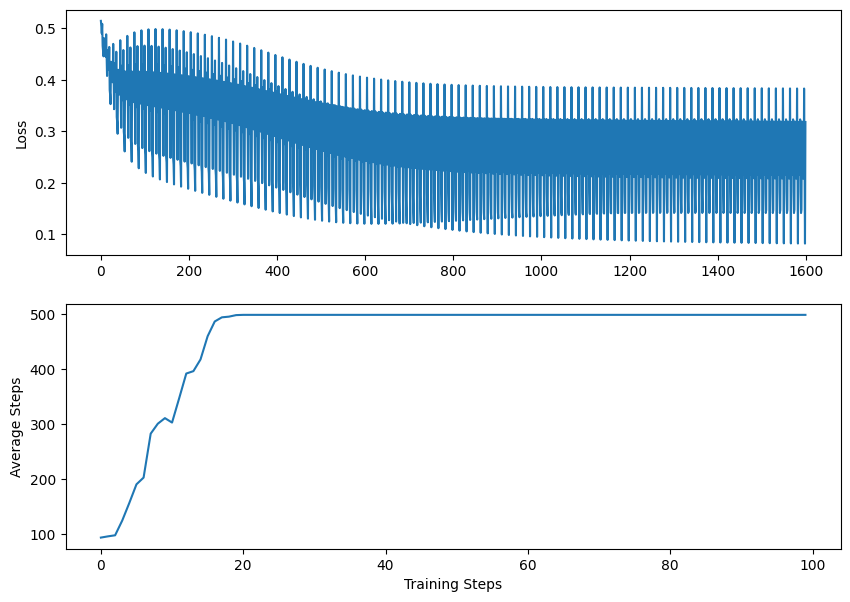

In [15]:
# visualize the learning curve, plot loss and average steps as a function of training steps, two subplots in one figure
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.subplot(2, 1, 1)
plt.plot(losses_imitation)
plt.ylabel('Loss')
plt.subplot(2, 1, 2)
plt.plot(reward_imitation)
plt.ylabel('Average Steps')
plt.xlabel('Training Steps')
plt.show()

In [120]:
# record a video of the imitation policy
env = gym.make('CartPole-v1', render_mode='rgb_array')
env = RecordVideo(env, './video_imitation', episode_trigger=lambda x: True)  # Record the first episode

horizon = 500
num_episodes = 1

steps = []
for i in range(num_episodes):
    step = policy_evaluation(horizon, imitation_policy)
    steps.append(step)
    print(F"Episode: {i}, Steps: {step}")
    
env.close()

t:   0%|          | 1/501 [56:36<471:40:07, 3396.02s/it, now=None]

Moviepy - Building video /Users/zeyuzhang/Library/CloudStorage/OneDrive-NorthwesternUniversity/NU courses/436_reinforcement_Learning/homework/hw1/video_imitation/rl-video-episode-0.mp4.
Moviepy - Writing video /Users/zeyuzhang/Library/CloudStorage/OneDrive-NorthwesternUniversity/NU courses/436_reinforcement_Learning/homework/hw1/video_imitation/rl-video-episode-0.mp4



t:   0%|          | 1/501 [56:36<471:44:33, 3396.55s/it, now=None]

Moviepy - Done !
Moviepy - video ready /Users/zeyuzhang/Library/CloudStorage/OneDrive-NorthwesternUniversity/NU courses/436_reinforcement_Learning/homework/hw1/video_imitation/rl-video-episode-0.mp4
Episode: 0, Steps: 499


# 5. Cartpole - Constrained Imitation Learning

Imitating the expert's action can be dangerous. If we encounter OOD data during deployment, there is a chance that the model will not know how to recover. 
After all, the expert never visits bad states. 

In this problem, we will consider one possible fix, constrained optimization. 


1. At each step of training, compute the KL divergence between the LQR policy actions and the imitation learning policy actions. 
2. Add a penalty to the imitation loss function that penalizes the imitation policy when it strays too far from the LQR policy (in terms of KL divergence)
3. Plot the learning curve for this modified loss. How does it compare? 

In [16]:
np.random.seed(42)

# This makes the cartpole env
env = gym.make('CartPole-v1')

env.action_space.seed(42)
env.observation_space.seed(42)

obs, info = env.reset()
print(obs)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

[-0.03078436  0.04655138  0.03775537 -0.04269523]


In [17]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        # This is a 2-layer neural network
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.tanh = nn.Tanh()
        self.fc2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.tanh(out)
        out = self.fc2(out)
        return out

input_size = 4
hidden_size = 32
num_classes = 2

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [18]:
with open('data_acts.npy', 'rb') as f:
    acts = np.load(f)

with open('data_obs.npy', 'rb') as f:
    obs = np.load(f)

In [19]:
acts = acts.astype(int)
# reshape acts to one dimension
acts = acts.reshape(-1)
acts[:10]

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 1])

In [20]:
# need to convert the actions to one-hot encoding
acts_onehot = np.zeros((len(acts), num_classes))
acts_onehot[np.arange(len(acts)), acts] = 1
acts_onehot = torch.from_numpy(acts_onehot).float()

# convert the observations to tensor
obs = torch.from_numpy(obs).float()
obs.shape

torch.Size([500, 4])

In [21]:
learning_rate = 1e-3
beta = 0.1  # KL divergence loss weight
criterion = nn.CrossEntropyLoss()
# add KL divergence loss between the the lqr policy and the learned policy
kl_criterion = nn.KLDivLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [26]:
total_step = 0
epoch = 0
num_epochs = 100
batch_size = 32
test_episodes = 100
losses_constraint = []
reward_constraint = []
for j in range(num_epochs):
    epoch += 1
    for i in range(len(obs)//batch_size+1):
        total_step += 1
        # formulate observation and action minibatches
        if i == len(obs)//batch_size:
            obs_mb = torch.tensor(obs[i*batch_size:], dtype=torch.float32).to(device)
            acts_mb = torch.tensor(acts_onehot[i*batch_size:], dtype=torch.float32).to(device)
        else:
            obs_mb = torch.tensor(obs[i*batch_size:(i+1)*batch_size], dtype=torch.float32).to(device)
            acts_mb = torch.tensor(acts_onehot[i*batch_size:(i+1)*batch_size], dtype=torch.float32).to(device)
        
        # get actions from LQR policy, for obs_mb
        lqr_actions = []
        for obs_tmp in obs_mb:
            action = lqr_policy(obs_tmp)
            lqr_actions.append(action)
        lqr_actions = torch.tensor(lqr_actions, dtype=torch.float32).to(device).reshape(-1, 1)
        # make one-hot encoding
        lqr_actions_onehot = torch.zeros((len(lqr_actions), num_classes)).to(device)
        lqr_actions_onehot.scatter_(1, lqr_actions.to(torch.int64), 1)

        # Forward pass
        # NOW YOU NEED TO BE SURE TO ACCOUNT FOR LQR_ACTS_MB to enforce the constraint. 
        # THAT IS, Make sure you pass it into the model during the forward step. 
        outputs = model(obs_mb.float())
        loss = criterion(outputs, acts_mb) + beta * kl_criterion(outputs, lqr_actions_onehot)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # record the loss
        losses_constraint.append(loss.item())
    
    # do evaluation for each epoch
    steps = []
    for i in range(test_episodes):
        step = policy_evaluation(horizon, imitation_policy)
        steps.append(step)
    avg_steps = np.mean(steps)
    reward_constraint.append(avg_steps)
    print('Epoch [{}/{}], Loss: {:.4f}, Average Steps: {:.2f}'
            .format(epoch + 1, num_epochs, loss.item(), avg_steps))

/var/folders/7z/tnnvjsr14ybc9d5kt7_3zlnh0000gn/T/ipykernel_43634/3001527631.py:17: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  obs_mb = torch.tensor(obs[i*batch_size:(i+1)*batch_size], dtype=torch.float32).to(device)
/var/folders/7z/tnnvjsr14ybc9d5kt7_3zlnh0000gn/T/ipykernel_43634/3001527631.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  acts_mb = torch.tensor(acts_onehot[i*batch_size:(i+1)*batch_size], dtype=torch.float32).to(device)
/Users/zeyuzhang/miniconda3/envs/ltr/lib/python3.10/site-packages/torch/nn/functional.py:2919: UserWarning: reduction: 'mean' divides the total loss by both the batch size and the support size.'batchmean' divides only by the batch size, and aligns w

Epoch [2/100], Loss: 0.6730, Average Steps: 22.46
Epoch [3/100], Loss: 0.6466, Average Steps: 38.29
Epoch [4/100], Loss: 0.6204, Average Steps: 52.23
Epoch [5/100], Loss: 0.5936, Average Steps: 52.30
Epoch [6/100], Loss: 0.5658, Average Steps: 60.24
Epoch [7/100], Loss: 0.5375, Average Steps: 63.10
Epoch [8/100], Loss: 0.5093, Average Steps: 68.79
Epoch [9/100], Loss: 0.4821, Average Steps: 75.88
Epoch [10/100], Loss: 0.4567, Average Steps: 78.96
Epoch [11/100], Loss: 0.4335, Average Steps: 85.29
Epoch [12/100], Loss: 0.4129, Average Steps: 82.67
Epoch [13/100], Loss: 0.3947, Average Steps: 83.34
Epoch [14/100], Loss: 0.3789, Average Steps: 78.11
Epoch [15/100], Loss: 0.3650, Average Steps: 91.85
Epoch [16/100], Loss: 0.3530, Average Steps: 81.20
Epoch [17/100], Loss: 0.3424, Average Steps: 87.31
Epoch [18/100], Loss: 0.3330, Average Steps: 103.28
Epoch [19/100], Loss: 0.3245, Average Steps: 102.88
Epoch [20/100], Loss: 0.3169, Average Steps: 107.72
Epoch [21/100], Loss: 0.3098, Averag

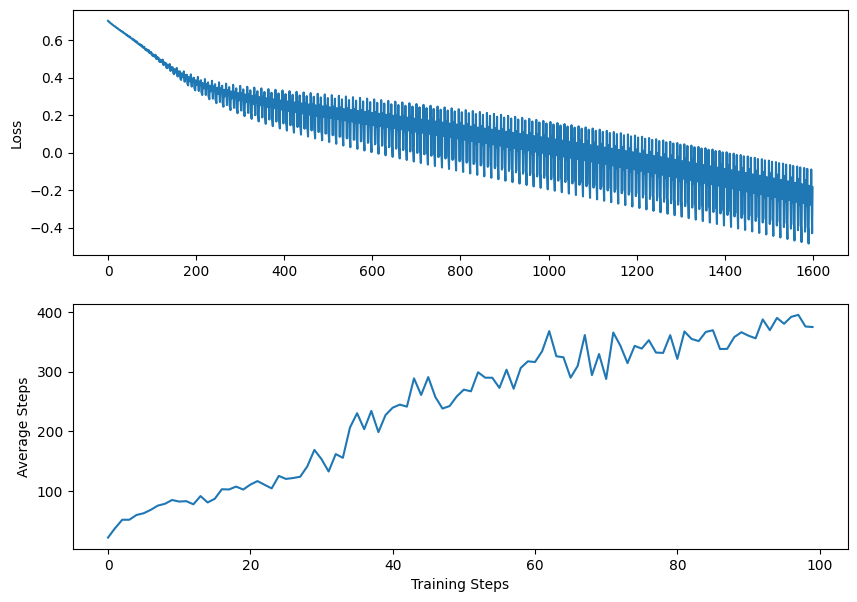

In [27]:
# visualize the learning curve, plot loss and average steps as a function of training steps, two subplots in one figure

plt.figure(figsize=(10, 7))
plt.subplot(2, 1, 1)
plt.plot(losses_constraint)
plt.ylabel('Loss')
plt.subplot(2, 1, 2)
plt.plot(reward_constraint)
plt.ylabel('Average Steps')
plt.xlabel('Training Steps')
plt.show()

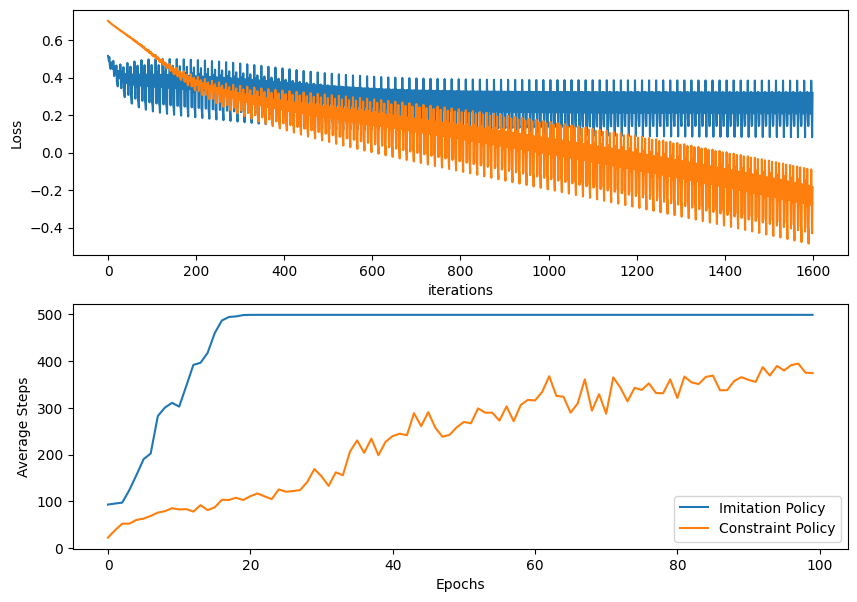

In [28]:
# put the imitation policy and the constraint policy into one figure, and compare the average steps of the two policies
plt.figure(figsize=(10, 7))
plt.subplot(2, 1, 1)
plt.plot(losses_imitation, label='Imitation Policy')
plt.plot(losses_constraint, label='Constraint Policy')
plt.ylabel('Loss')
plt.xlabel('iterations')
plt.subplot(2, 1, 2)
plt.plot(reward_imitation, label='Imitation Policy')
plt.plot(reward_constraint, label='Constraint Policy')
plt.ylabel('Average Steps')
plt.xlabel('Epochs')
plt.legend()
plt.show()




It's interesting that with the constraint, the performance of the imitation policy is downgraded. I think the possible reason is that the Cartpole problem is simple enough that most states have already been fully explored by the experts, and contained in the training data. Thus, using only the expert data is efficient enough to solve the problem, and there's no OOD data. 

However, when we add the LQR constraint, the two policies might conflict with each other in some states, leading to a suboptimal performance. Besides, the LQR policy is an approximation with state transition approximated as linear. Therefore, LQR policy itself might contain some errors, which will be transferred to the imitation policy.

In [30]:
# record a video of the constraint policy
from gym.wrappers import RecordVideo

env = gym.make('CartPole-v1', render_mode='rgb_array')
env = RecordVideo(env, './video_constraint', episode_trigger=lambda x: True)  # Record the first episode

horizon = 500
num_episodes = 1

steps = []
for i in range(num_episodes):
    step = policy_evaluation(horizon, imitation_policy)
    steps.append(step)
    
env.close()

Moviepy - Building video /Users/zeyuzhang/Library/CloudStorage/OneDrive-NorthwesternUniversity/NU courses/436_reinforcement_Learning/homework/hw1/video_constraint/rl-video-episode-0.mp4.
Moviepy - Writing video /Users/zeyuzhang/Library/CloudStorage/OneDrive-NorthwesternUniversity/NU courses/436_reinforcement_Learning/homework/hw1/video_constraint/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /Users/zeyuzhang/Library/CloudStorage/OneDrive-NorthwesternUniversity/NU courses/436_reinforcement_Learning/homework/hw1/video_constraint/rl-video-episode-0.mp4


# Appendix: Videos

In this section, we provide videos that show the performance of the policies in the Cartpole problem, each with one complete iteration.

In [31]:
# embed the videos in the notebook
from IPython.display import Video

## 1. `sin_policy` iteration

In [32]:
# sin_policy video
Video('./video/rl-video-episode-0.mp4')

## 2. `random_policy` iteration

In [33]:
Video('./video/rl-video-episode-1.mp4')

## 3. `my_policy` iteration

In [34]:
Video('./video/rl-video-episode-2.mp4')

## 4. `lqr_policy` iteration

In [35]:
Video('./video/rl-video-episode-3.mp4')

## 5. `imitation_policy` iteration

In [36]:
Video('./video_imitation/rl-video-episode-0.mp4')

## 6. `constrained_imitation_policy` iteration

In [37]:
Video('./video_constraint/rl-video-episode-0.mp4')